In [1]:
#Customer Waiting Time by Monte Carlo Simulation

In [2]:
import random
import matplotlib
import matplotlib.pyplot as plt
import math

In [3]:
#customers in queue
class Queue:
    def __init__(self):
        # create an empty queue
        self.items = []

    def isEmpty(self):
        #Check if there is customers in the current waiting queue
        return self.items == []

    def enqueue(self, item):
        #add new customer to the end of queue
        self.items.insert(0, item)

    def dequeue(self):
        #remove the customer from the beginning of the queue
        return self.items.pop()

    def size(self):
        #return the number of items in the queue
        return len(self.items)

In [4]:
'''customers can order 1 to 10 numbers'''

class Customers_to_be_Served:
    def __init__(self, time):
        
        #:param time: Customer arrival time
        
        self.Customer_arrival_time = time
        self.item = random.randrange(1,11)  # generates a random number between 1 and 10

    def getTime(self):
        #returns customer arrival time
        return self.Customer_arrival_time

    def getItem(self):
        #returns the number of items ordered depending on the random number generated
        return self.item

    def waitTime(self, Serve_Time):
        #param Serve_Time: When customer is at the counter for being served
        #return: Total waiting time for that customer
        #wait time = service time - arrival time
        return Serve_Time - self.Customer_arrival_time


In [5]:
class Cashier_serving_Customer:
    def __init__(self, itemspm):

        #:param itemspm:Items served by the cashier per minute
        
        self.rate = itemspm  # serving rate(items entered by the cashier per min)
        self.currentCustomer = None
        self.timeRemaining = 0

    def setIdle(self):
        if self.currentCustomer != None:
            # if the customer at the counter takes one second to leave the counter  subtract that 1 second)
            self.timeRemaining = self.timeRemaining - 1 
            if self.timeRemaining <= 0:  
                # At this point the customer has been served and the cashier is ready to serve other customer.
                self.currentCustomer = None

    def busy(self):
        #Returns a boolean True if there is a customer at the counter and cashier is busy with him/her.
        if self.currentCustomer != None:
            return True
        else:
            return False

    def Next(self, newCustomer):
        #:param newCustomer: New customer at the counter
        #:return: Returns the serving time of the new customer at the counter depending on the number of items ordered   
        self.currentCustomer = newCustomer
        self.timeRemaining = newCustomer.getItem() * 60 / self.rate
        

In [6]:
'''
considered 3 customers arriving per min on average 
(either at the counter if cashier is free or in the queue if cashier is busy). 
This means that on average there will be one customer every 20 seconds.
For every second we can simulate the chance that a customer comes by generating a random number between 1 and 20. 
If the number is 20, this means a customer is in the queue.
'''

def new_Customer():
    #The function thus returns a boolean True upon customer's arrival.
    Cust = random.randrange(1, 21)
    if Cust == 20:
        return True
    else:
        return False

In [7]:
def simulation(numSec, itemsPermin):

    #:param numSec: Time frame considered for simulation (can be anything)
    #:param itemsPermin: Items served by the cashier per min
    #return: average waiting time and the number of customers
    
    restCashier = Cashier_serving_Customer(itemsPermin)  # creating object of class Cashier_serving_Customer
    waitingTimes = []  # list for storing wait time of each customer
    q = Queue()

    for currentSec in range(numSec):
        # When the customer has arrived at the restaurant and is pushed into the queue
        if new_Customer():
            serving = Customers_to_be_Served(currentSec)
            q.enqueue(serving)
        # When the customer at the counter has been served
        if (not restCashier.busy()) and (not q.isEmpty()):
            nextCust = q.dequeue()
            waitingTimes.append(nextCust.waitTime(currentSec))  #wait time for each customer is appended to the list
            restCashier.Next(nextCust)  # calculates the time that the current customer is taking at the counter
        restCashier.setIdle()  # current customer has now left and the cashier is available to serve the next customer

    averageWaitingTime = sum(waitingTimes) / len(waitingTimes)  ##calculates average waiting time

    return averageWaitingTime

In [8]:
'''
taking a fixed time frame of 600 seconds as an example to visualize simulation
results within this time frame by changing the number of items served by the cashier (per min) from 10 to 40.
'''
time_frame = 600

#stores the avg max waiting time, avg min waiting time, avg waiting time among all 100 simulations for each items per min
maxTime = [] 
minTime = [] 
avgTime = [] 

for itemsPerMinute in range(10, 41, 1): #taking items per min in range 10 through 40
    maxWaitTime = 0
    minWaitTime = math.inf
    totalWaitTime = 0
    for i in range(100): #taking 100 simulations
        '''
        running 100 simulations each time (for different number of items per min) and
        calculating the best, average and the worst case of customer
        among those 100 simulations everytime.
        '''
        waitingTime = simulation(time_frame, itemsPerMinute)
        maxWaitTime = max(maxWaitTime, waitingTime)
        minWaitTime = min(minWaitTime, waitingTime)
        totalWaitTime += waitingTime
    maxTime.append(maxWaitTime)
    minTime.append(minWaitTime)
    avgTime.append(totalWaitTime / 10)

In [9]:
from IPython import display
import pandas as pd
import numpy as np

itemspm=[]
for i in range(10,41,1):
    itemspm.append(i)
    
print("For time frame of 600 seconds the avg maximum waiting time, avg minimum waiting time and avg waiting time over 100 simulations is tabulated below")

data = {'Items served per min':itemspm,'MaxTime(in sec)':maxTime,'MinTime(in sec)':minTime,'AvgTime(in sec)':avgTime}
df = pd.DataFrame(data)
display.display(df)

For time frame of 600 seconds the avg maximum waiting time, avg minimum waiting time and avg waiting time over 100 simulations is tabulated below


,Items served per min,MaxTime(in sec),MinTime(in sec),AvgTime(in sec)
0,10,220.052632,32.764706,1235.390448
1,11,221.150000,16.555556,1047.697293
2,12,182.681818,9.047619,966.373853
3,13,207.680000,14.312500,812.465965
4,14,198.040000,8.900000,704.875540
5,15,176.120000,8.105263,627.779775
6,16,135.400000,6.055556,511.069823
7,17,125.200000,1.866667,451.044074
8,18,123.846154,3.095238,323.397756
9,19,107.428571,5.388889,321.430349


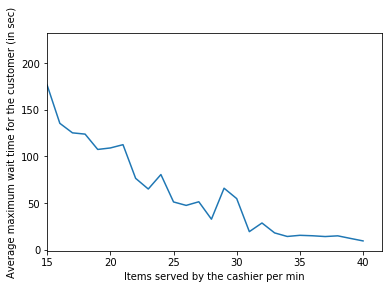

In [10]:
fig, ax = plt.subplots()
ax.plot(range(10, 41, 1), maxTime)
ax.set_xlim(15)
ax.set_xlabel('Items served by the cashier per min')
ax.set_ylabel('Average maximum wait time for the customer (in sec)')

plt.show()

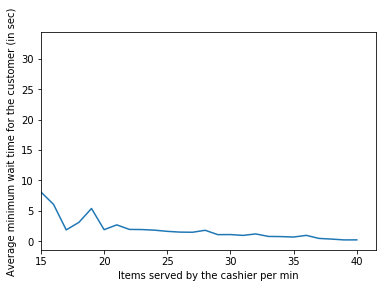

In [11]:
fig, ax = plt.subplots()
ax.plot(range(10, 41, 1), minTime)
ax.set_xlim(15)
ax.set_xlabel('Items served by the cashier per min')
ax.set_ylabel('Average minimum wait time for the customer (in sec)')

plt.show()

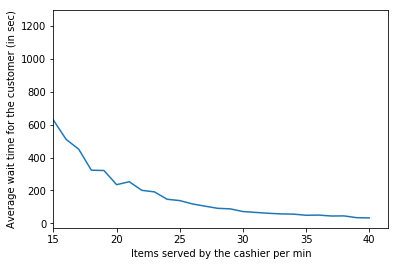

In [12]:
fig, ax = plt.subplots()
ax.plot(range(10, 41, 1), avgTime)
ax.set_xlim(15)
ax.set_xlabel('Items served by the cashier per min')
ax.set_ylabel('Average wait time for the customer (in sec)')

plt.show()